<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/pp_cur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [2]:
import warnings

warnings.filterwarnings('ignore')

input

In [3]:
df = pd.read_csv("pp_cur.csv")

exploratory

In [4]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Knowledge        1238 non-null   int64
 1   Problem Solving  1238 non-null   int64
 2   Interaction      1238 non-null   int64
 3   Impact           1238 non-null   int64
 4   Accountability   1238 non-null   int64
dtypes: int64(5)
memory usage: 48.5 KB


In [5]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,40,15,20,30,0
1,40,15,20,30,0
2,40,15,20,30,0
3,40,20,20,30,0
4,40,20,20,30,0


checks

In [6]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,124.634087,43.340872,44.490307,108.412763,24.983037
std,50.693965,21.083085,18.631503,44.318518,19.355472
min,40.000000,15.000000,20.000000,30.000000,0.000000
25%,89.000000,27.000000,27.000000,64.000000,0.000000
50%,118.000000,36.000000,36.000000,116.000000,25.000000
75%,150.000000,48.000000,49.000000,128.000000,40.000000
max,300.000000,117.000000,129.000000,230.000000,75.000000


In [7]:
X=df

Scaling

In [8]:
cols = X.columns

In [9]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [10]:
X = pd.DataFrame(X, columns=[cols])

In [11]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.0,0.00000,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0
3,0.0,0.04902,0.0,0.0,0.0
4,0.0,0.04902,0.0,0.0,0.0


In [12]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.000000,0.000000,0.000000,0.000,0.000000
1,0.000000,0.000000,0.000000,0.000,0.000000
2,0.000000,0.000000,0.000000,0.000,0.000000
3,0.000000,0.049020,0.000000,0.000,0.000000
4,0.000000,0.049020,0.000000,0.000,0.000000
...,...,...,...,...,...
1233,0.865385,0.705882,0.422018,0.760,0.706667
1234,0.688462,1.000000,0.642202,0.915,0.560000
1235,0.865385,0.705882,0.422018,1.000,0.800000
1236,0.688462,1.000000,0.642202,0.915,0.733333


K means

In [13]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [14]:
kmeans.cluster_centers_

array([[0.2055123 , 0.15617475, 0.13120133, 0.25355601, 0.20674764],
       [0.5044343 , 0.4592654 , 0.3640559 , 0.59857143, 0.52150235]])

inertia

In [15]:
kmeans.inertia_

144.22426964001892

Elbow

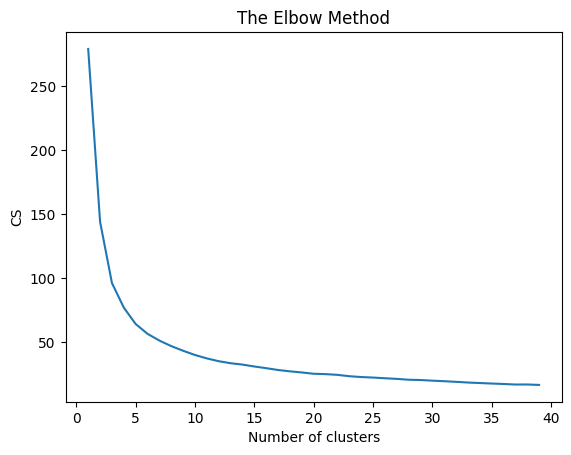

In [16]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

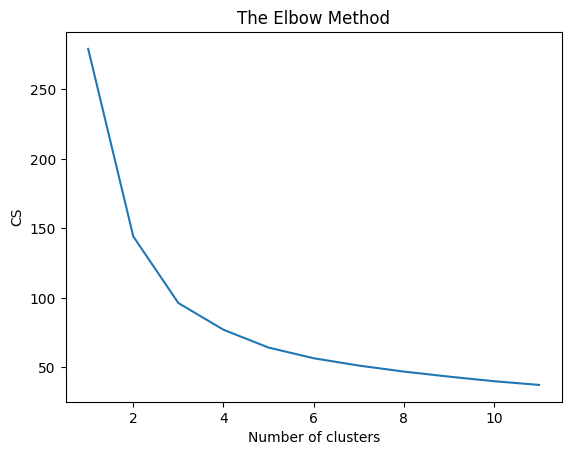

In [17]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [62]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=458) 

kmeans.fit(X)

KMeans(n_clusters=4, random_state=458)

In [63]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('pp_cur_l.csv')
print(labels)

[0 0 0 ... 3 3 3]


In [64]:
Z=kmeans.cluster_centers_
Z

array([[1.75206612e-01, 1.35202290e-01, 1.26292112e-01, 1.94132231e-01,
        8.88178420e-16],
       [4.12993458e-01, 3.55212466e-01, 3.07325997e-01, 5.17155425e-01,
        4.84183773e-01],
       [2.30821066e-01, 1.65530363e-01, 1.26709365e-01, 3.07425876e-01,
        4.32452830e-01],
       [6.92779613e-01, 6.89341994e-01, 4.93893173e-01, 7.63803681e-01,
        5.32760736e-01]])

In [65]:
import matplotlib

In [66]:
np.unique(labels)


array([0, 1, 2, 3], dtype=int32)

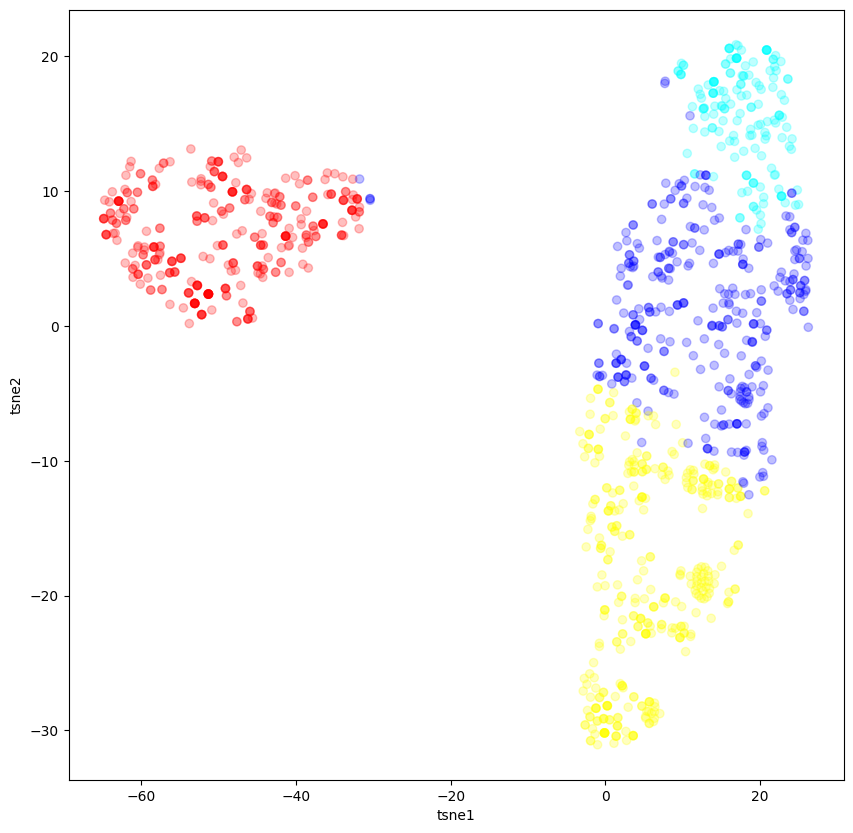

In [67]:
colors = ["red","green","blue","purple","yellow","cyan"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [68]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_pp_cur.csv')
Z2

array([[8.55537190e+01, 2.87906336e+01, 3.37658402e+01, 6.88264463e+01,
        6.66133815e-14],
       [1.47378299e+02, 5.12316716e+01, 5.34985337e+01, 1.33431085e+02,
        3.63137830e+01],
       [1.00013477e+02, 3.18840970e+01, 3.38113208e+01, 9.14851752e+01,
        3.24339623e+01],
       [2.20122699e+02, 8.53128834e+01, 7.38343558e+01, 1.82760736e+02,
        3.99570552e+01]])

In [69]:
P = pd.read_csv("tr.csv")
P = ms.fit_transform(P)
P2=kmeans.predict(P)
P2

FileNotFoundError: ignored